# <font color=red>Bike  Sharing Assignment<font>

# <font color=blue> Introduction </font>

-   In order to complete this assignment, we must create a model for predicting the demand for shared bikes.

# <font color=blue> Problem Statement </font>

-   A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

-   A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

-   In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

-  Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# <font color=blue> Business Goal </font>

-  We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# <font color=blue>Solution</font>

## <font color=orange>Data Understanding</font>

In [142]:
#Importing all libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Use for Ignore Warnings in Notebook
import warnings
warnings.filterwarnings('ignore')


In [143]:
#Import Data Frame

bike_df=pd.read_csv('F:/Bike Sharing Assignment/day.csv')

In [144]:
#Read whole Dataframe

bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [145]:
#Read first 10 Rows from Dataframe

bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [146]:
#Check Shape of Dataframe

bike_df.shape

(730, 16)

In [147]:
#Information about Dataframe

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [148]:
#Check Numeric Columns from Dataframe

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## <font color=orange>Data Quality Check</font>

### <font color=green>_Check Missing Values_</font>

In [149]:
#Percentage of missing values in each column of Dataframe

missing_Value=round(100*(bike_df.isnull().sum()/len(bike_df)), 2)
missing_Value.sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### <font color=blue>Insights</font>
-  There is no missing values in any columns in dataframe.

### <font color=green>_Check Null Values_</font>

In [150]:
# row-wise null count percentage

null_Value=round((bike_df.isnull().sum(axis=1)/len(bike_df))*100,2)
null_Value.sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

### <font color=blue>Insights</font>
-  There is no null values in any columns in dataframe.

### <font color=green>_Check Duplicate Data Values_</font>

In [151]:
#Copy dataframe from orginal dataframe into another variable

duplicate_df=bike_df.copy()

In [152]:
#Check shape of Duplicate Dataframe

duplicate_df.shape

(730, 16)

In [153]:
#Checking for duplicates and dropping the entire duplicate row if having in dataframe

duplicate_df.drop_duplicates(subset=None, inplace=True)

In [154]:
#Check again shape of Duplicate Dataframe

duplicate_df.shape

(730, 16)

### <font color=blue>Insights</font>
-  Before and After Applying drop_duplicates function on duplicate dataframe,in both scenario dataframe having same shape,So Conclude that No any Duplicate Rows are here.

## <font color=orange>Data Cleaning</font>

### <font color=green>_Remove Unwanted Columns_</font>

-  The following variables can be excluded from further analysis based on the data dictionary and a high-level examination of the data:
1. __instant__ : Its only an index value,So we can remove it this column.
2. __dteday__ :Since we already have separate columns for "year" and "month," we could do without this column. This contains the date,So we can remove it this column.
3. __casual & registered__ : Both of these columns—contain the number of bikes reserved by various customer types. We won't use these two columns because our goal is to determine the total number of bikes, not the number of bikes in each category. Additionally, a new variable that contains the ratio of various client kinds has been added,So we can remove it this column.

In [155]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### <font color=blue>Insights</font>
-  There are 16 Columns in dataframe in which we don't need 4 Columns(instant,dteday,causal,registerd) for further analysis,So we create new dataframe with all columns except 4 Columns.

In [156]:
new_bike_df=bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [157]:
# Information about new Dataframe

new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## <font color=orange>Handling of Categorical Variables</font>

-  We will create Dummy variables for below Categorical Variables :
1. mnth
2. weekday
3. weathersit
4. season

-  Before creating dummy variables, we will have to convert them into 'category' data types.

In [158]:
# Check the datatypes before convertion of dataframe

new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### <font color=blue>Insights</font>
-  All Column having Data types only int and float.

In [159]:
# Convert to category data type for all dummy variables

new_bike_df['season']=new_bike_df['season'].astype('category')
new_bike_df['weathersit']=new_bike_df['weathersit'].astype('category')
new_bike_df['mnth']=new_bike_df['mnth'].astype('category')
new_bike_df['weekday']=new_bike_df['weekday'].astype('category')

In [160]:
# Check the datatypes after convertion of dataframe

new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


## <font color=orange>Creating Dummy Variables</font>

- We can create dummy variable by get_dummies method in which done three things:
1. Create Dummy variable
2. Drop original variable for which the dummy was created
3. Drop first dummy variable for each set of dummies created.

In [161]:
new_bike_df = pd.get_dummies(new_bike_df, drop_first=True)
new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

### <font color=blue>Insights</font>
- We can see that 8 columns are original columns and 22 dummy columns are created by us which have type uint.

## <font color=orange>Spliting Dataframe-70:30(Training Data:Testing Data)</font>

In [162]:
#Check the shape of Dataframe before splitting

new_bike_df.shape

(730, 30)

In [163]:
#Check the information of Dataframe before spliting

new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

-  Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
-  For that We will use train_test_split method from sklearn package.

In [164]:
#Split the Dataframe with sklearn package

from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_train, bike_test = train_test_split(new_bike_df, train_size = 0.70, test_size = 0.30, random_state = 333)

In [165]:
#Verify the Shape of Training Datasframe

bike_train.shape

(510, 30)

In [166]:
#Verify the Information of Training Datasframe

bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [167]:
#Verify the Shape of Testing Datasframe

bike_test.shape

(219, 30)

In [168]:
#Verify the Information of Testing Datasframe

bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

## <font color=orange>Exploratory Data Analysis</font>

In [169]:
# Check Columns of Training Dataframe

bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

### <font color=green>_EDA With Numeric Variables_</font>

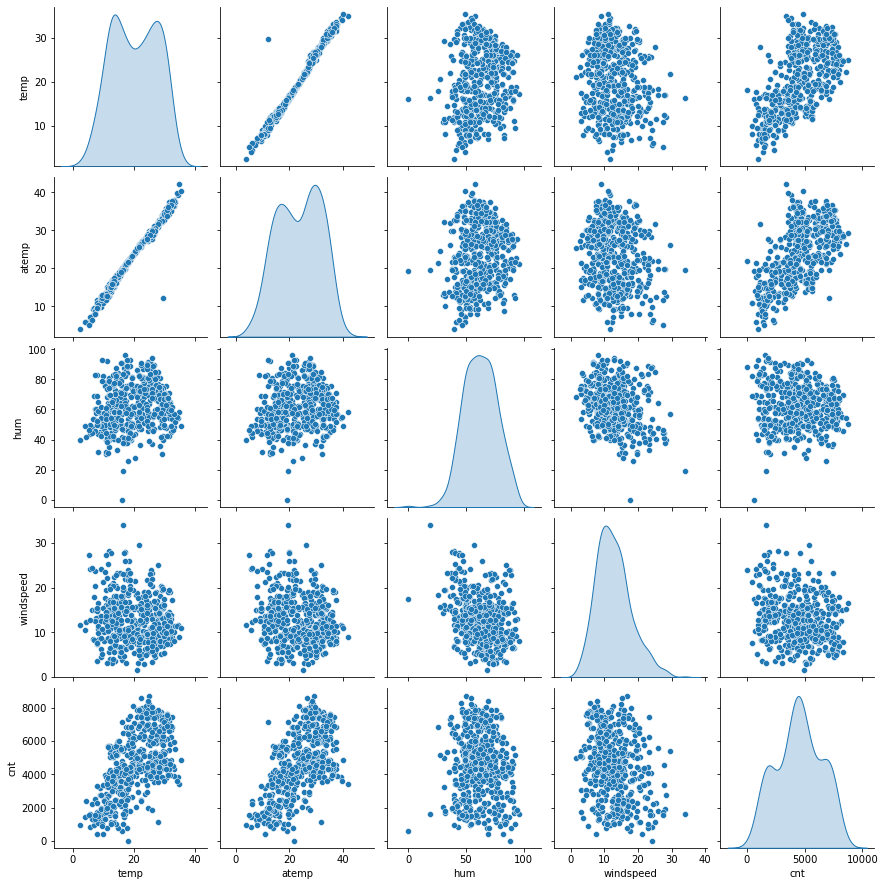

In [170]:
# Create a new dataframe of only numeric variables:

bike_num=bike_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### <font color=blue>Insights</font>
- According to the pair-plot above, there is a LINEAR RELATION between the variables "temp," "atemp","cnt".

### <font color=green>_EDA With Categorical Variables_</font>

In [171]:
#Cheack the information of Training Dataframe

bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

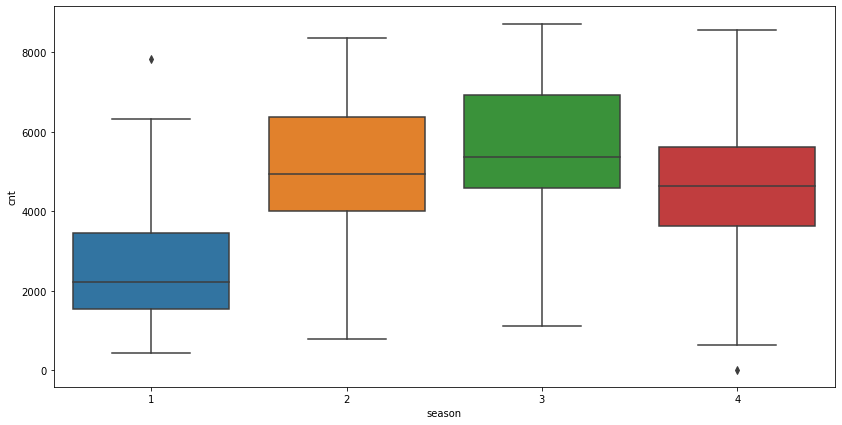

In [172]:
# Build boxplot-season v/s target variable 'cnt' 

plt.figure(figsize=(14,7))
sns.boxplot(data=bike_df,x='season',y='cnt')
plt.show()

### <font color=blue>Insights</font>
- With a median of over 5000 bookings, season 3 saw about 32% of the bike reservations (for the period of 2 years). The following seasons, with 27% and 25% of all bookings, were seasons 2 and 4. This suggests that the season may be a reliable predictor of the dependent variable.

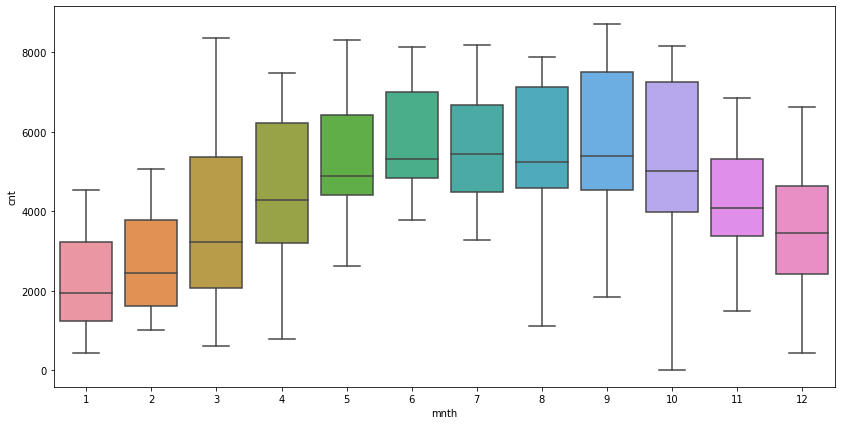

In [173]:
# Build boxplot-mnth v/s target variable 'cnt' 

plt.figure(figsize=(14,7))
sns.boxplot(data=bike_df,x='mnth',y='cnt')
plt.show()

### <font color=blue>Insights</font>
- With a median of over 4000 bookings per month, about 10% of the bike reservations took place in the months 5, 6, 7, 8, and 9. This shows that mnth has a clear trend and can effectively predict the dependent variable.

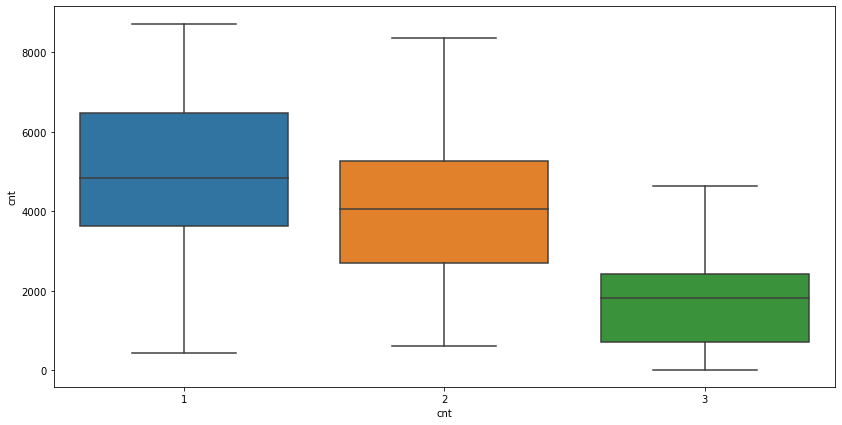

In [174]:
# Build boxplot-weathersit v/s target variable 'cnt' 

plt.figure(figsize=(14,7))
sns.boxplot(data=bike_df,x='weathersit',y='cnt')
plt.xlabel('cnt')
plt.show()

### <font color=blue>Insights</font>
-  A median of about 5000 bike bookings occurred during "weathersit," accounting for nearly 67% of all bookings (for the period of 2 years). With 30% of all bookings, weathersit2 came in second. This suggests that Weathersit does exhibit a trend toward bike reservations, which may be a useful indicator of the dependent variable.

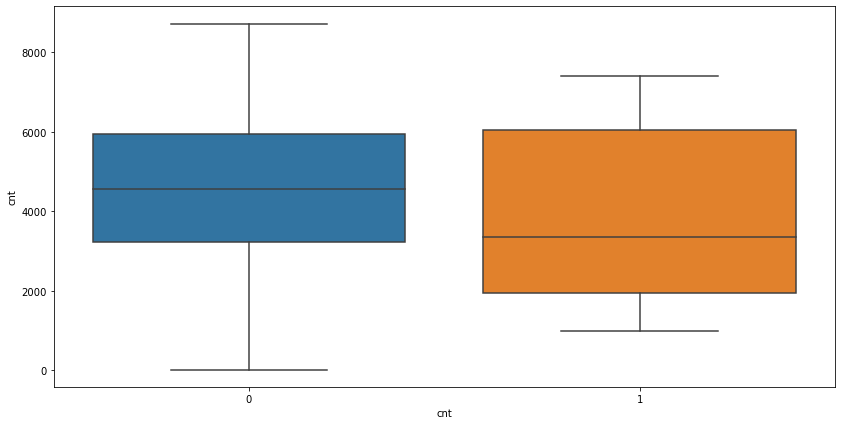

In [175]:
# Build boxplot-holiday v/s target variable 'cnt' 

plt.figure(figsize=(14,7))
sns.boxplot(data=bike_df,x='holiday',y='cnt')
plt.xlabel('cnt')
plt.show()

### <font color=blue>Insights</font>
- The fact that nearly 97.6% of bike reservations took place during non-holiday times shows that this data is skewed. This suggests that the dependent variable can not be well predicted by the holiday.

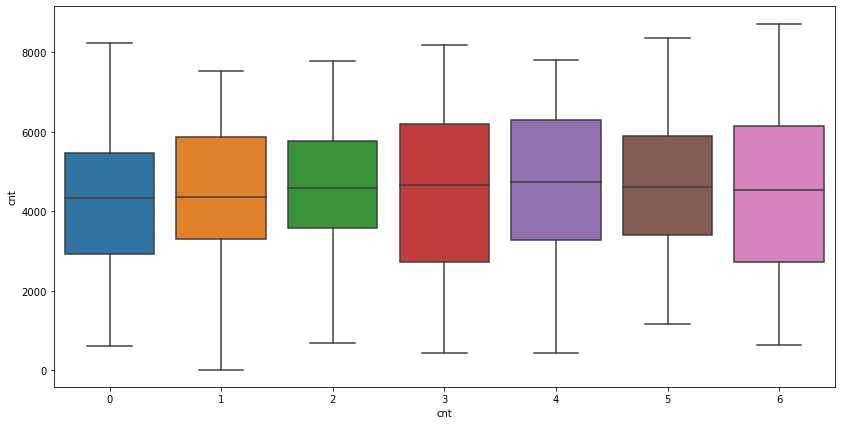

In [176]:
# Build boxplot-weekday v/s target variable 'cnt' 

plt.figure(figsize=(14,7))
sns.boxplot(data=bike_df,x='weekday',y='cnt')
plt.xlabel('cnt')
plt.show()

### <font color=blue>Insights</font>
- Weekday variables have separate medians between 4,000 and 5,000 reservations and exhibit a very close trend (between 13.5% and 14.8% of total booking on all days of the week). This variable may or may not have any bearing on the predictor. If this needs to be added or not, I'll leave that up to the model.

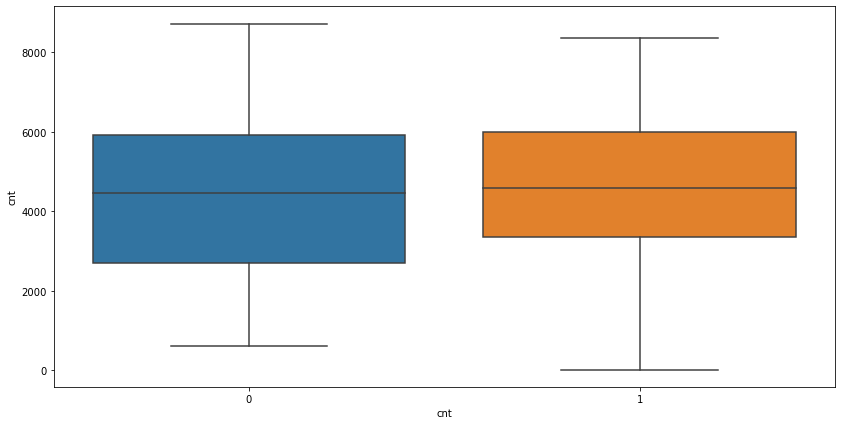

In [177]:
# Build boxplot-working day v/s target variable 'cnt' 

plt.figure(figsize=(14,7))
sns.boxplot(data=bike_df,x='workingday',y='cnt')
plt.xlabel('cnt')
plt.show()

### <font color=blue>Insights</font>
- A median of nearly 5000 bike bookings occurred during "workingday," accounting for nearly 69% of all bookings. This suggests that the working day can serve as a reliable predictor of the dependent variable.

### <font color=green>_Check Variable Correlation_</font>

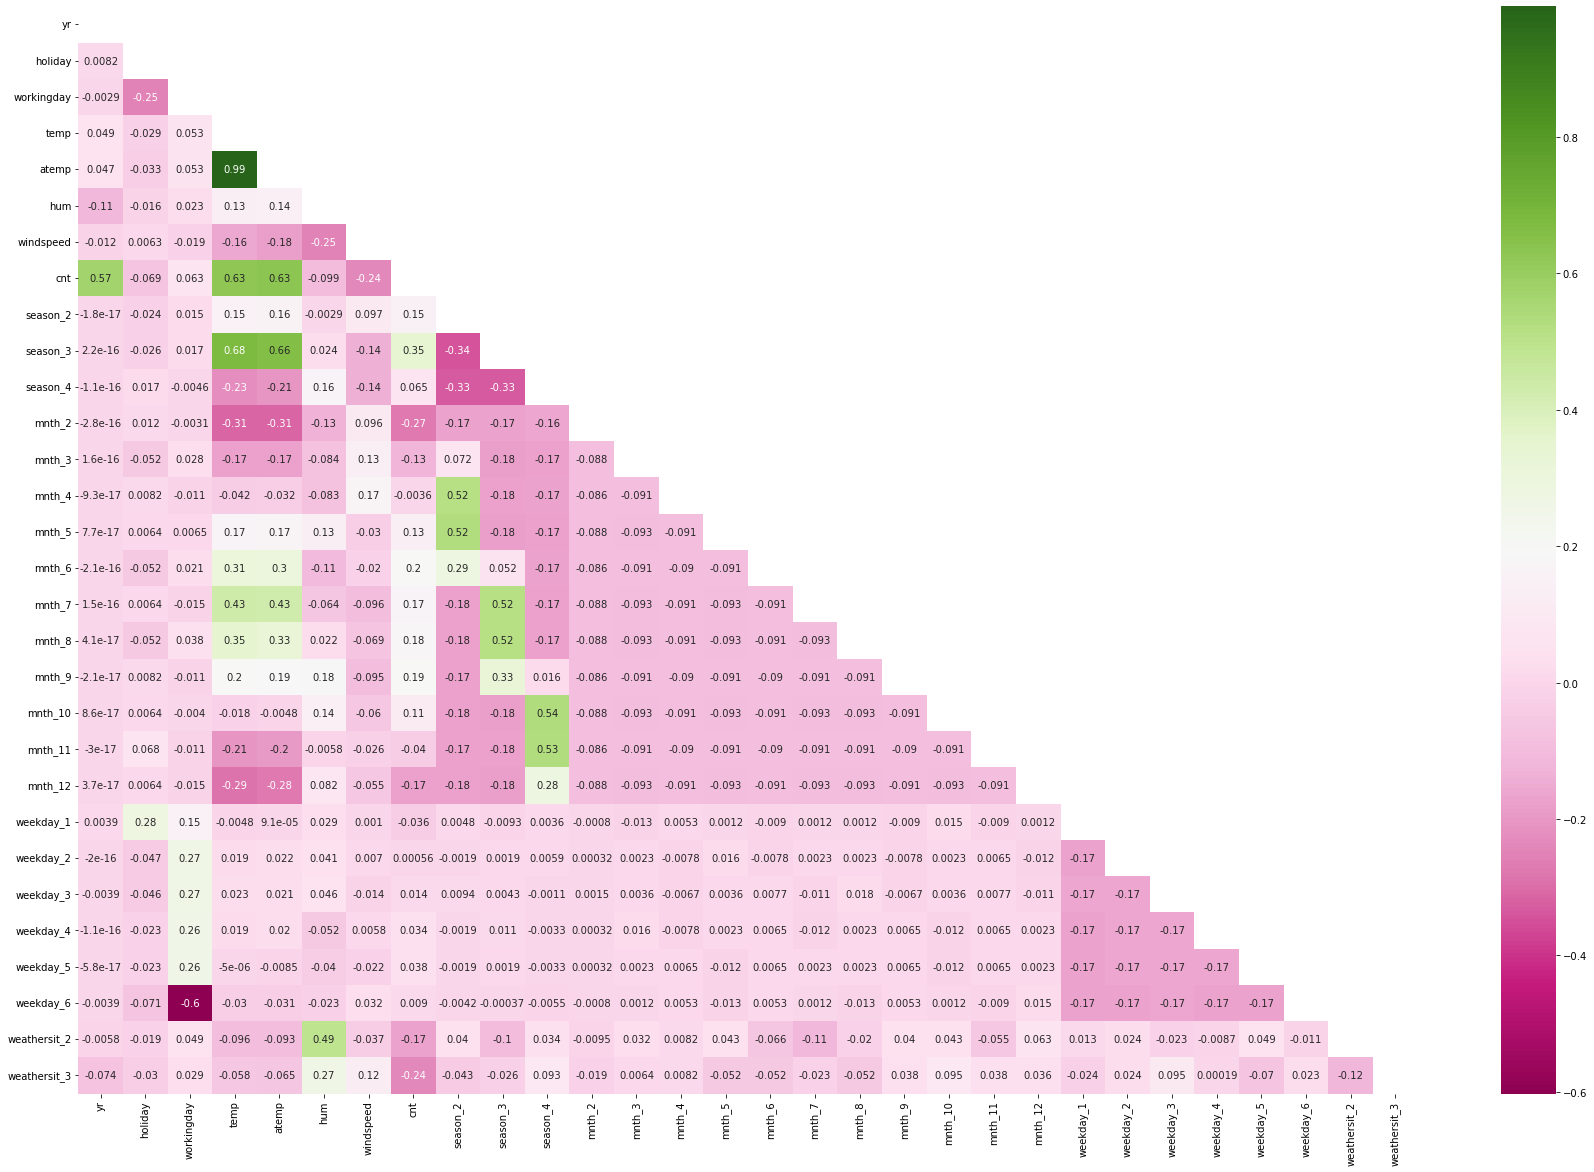

In [178]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,20))
matrix = np.triu(new_bike_df.corr())
sns.heatmap(new_bike_df.corr(), annot = True, cmap="PiYG",mask=matrix)
plt.show()

### <font color=blue>Insights</font>
- The heatmap makes it evident which variables are highly collinear with the target variable and which are multicollinear in nature.

### <font color=green>_Rescaling Features of Dataframe_</font>

In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [180]:
# Checking the values before scaling of Features in Dataframe
bike_train.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0
502,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,1,0,...,0,0,0,0,0,0,1,0,0,0
638,1,0,1,21.354153,25.60000,64.9167,6.083881,6778,0,0,...,0,0,1,0,0,0,0,0,1,0
421,1,0,0,11.445847,13.41540,41.0000,13.750343,3389,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,1,9.054153,9.91230,53.7917,24.250650,1530,0,0,...,0,0,0,1,0,0,0,0,0,0
241,0,0,1,26.205847,29.73520,54.8333,8.375536,5204,0,1,...,0,0,0,1,0,0,0,0,0,0


In [181]:
#Check Columns of Training Dataframe

bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [182]:
#Applying Scaling to all numeric variables and check again Values in Dataframe

num_Features = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[num_Features] = scaler.fit_transform(bike_train[num_Features])
bike_train.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0
502,1,0,1,0.629300,0.619631,0.543723,0.235894,0.876323,1,0,...,0,0,0,0,0,0,1,0,0,0
638,1,0,1,0.575304,0.568280,0.674459,0.141036,0.777266,0,0,...,0,0,1,0,0,0,0,0,1,0
421,1,0,0,0.274176,0.248401,0.425974,0.376929,0.387368,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,1,0.201489,0.156435,0.558875,0.700017,0.173493,0,0,...,0,0,0,1,0,0,0,0,0,0
241,0,0,1,0.722754,0.676840,0.569697,0.211549,0.596180,0,1,...,0,0,0,1,0,0,0,0,0,0


In [183]:
#Checking Numeric Features

bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color=orange>Building Model</font>

### <font color=green>_Divide Dataframe X and Y Sets_</font>

In [184]:
#Remove Target Variable from Dataframe in Y Set

y_train = bike_train.pop('cnt')
X_train = bike_train

### <font color=green>_Recursive Feature Elimination_</font>

In [185]:
# Importing RFE and LinearRegression Packages from scikit learn

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [186]:
# Running RFE with the output number equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)          
rfe = rfe.fit(X_train, y_train)

In [187]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 14),
 ('weekday_1', False, 6),
 ('weekday_2', False, 12),
 ('weekday_3', False, 10),
 ('weekday_4', False, 11),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [188]:
# selecting the selected variable via RFE in col list

rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [189]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [190]:
# Check for the VIF values of the feature 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [191]:
# Generic function to calculate VIF of variables and reduce the repeated Code Logic

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


### <font color=green>_Building Model-1_</font>

In [192]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[rfe_col]

In [193]:
# calculate VIF for Model-1

calculateVIF(X_train_rfe)

,Features,VIF
2,temp,384.22
3,atemp,363.12
4,hum,17.52
7,season_3,7.09
5,windspeed,4.71
1,workingday,4.61
6,season_2,3.54
8,season_4,3.01
13,weathersit_2,2.14
0,yr,2.02


In [194]:
import statsmodels.api as sm

# Add a constant in Model-1
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [195]:
# Check the parameters obtained from Model-1

lr1.params

const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64

In [196]:
# Check and Print Summary obtained from Model-1

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.28e-186
Time:                        12:31:23   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

### <font color=blue>Insights</font>
- From Model-1 We conclude that __atemp__ variable have __High VIF Value-363.12__ and __High p-value:0.670__.
- So we build next Model with removing it.

### <font color=green>_Building Model-2_</font>

In [197]:
#Removing atemp variable from Dataframe and build a model

X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [198]:
# calculate VIF for Model-2

calculateVIF(X_train_new)

,Features,VIF
2,temp,23.21
3,hum,17.23
6,season_3,7.01
1,workingday,4.60
4,windspeed,4.55
5,season_2,3.54
7,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


In [199]:
# Add a constant in Model-2
X_train_lm2 = sm.add_constant(X_train_new)

# Create a second fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [200]:
# Check the parameters obtained from Model-2

lr2.params

const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [201]:
# Check and Print Summary obtained from Model-2

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.00e-187
Time:                        12:31:23   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

### <font color=blue>Insights</font>
- From Model-2 We conclude that __temp__ variable have __High VIF Value-23.21__ and  __hum__ variable also have __High VIF Value-17.23__ 
- Despite the fact that hum has the second-highest VIF, we chose to drop "hum" rather than "temp" because it is widely known that temperature can be a significant influence for an industry like bike rentals.

### <font color=green>_Building Model-3_</font>

In [202]:
#Removing hum variable from Dataframe and build a model

X_train_new = X_train_new.drop(["hum"], axis = 1)

In [203]:
# calculate VIF for Model-3

calculateVIF(X_train_new)

,Features,VIF
2,temp,16.81
5,season_3,6.75
3,windspeed,4.27
1,workingday,4.11
4,season_2,3.51
6,season_4,2.89
0,yr,2.02
9,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [204]:
# Add a constant in Model-3
X_train_lm3 = sm.add_constant(X_train_new)

# Create a third fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [205]:
# Check the parameters obtained from Model-3

lr3.params

const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [206]:
# Check and Print Summary obtained from Model-3

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          4.52e-184
Time:                        12:32:41   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

### <font color=blue>Insights</font>
- From Model-3 We conclude that __temp__ variable have __High VIF Value-16.81__ and  __season_3__ variable also have __High VIF Value-6.75__ 
- Despite the fact that hum has the second-highest VIF, we chose to drop "season_3" rather than "temp" because it is widely known that temperature can be a significant influence for an industry like bike rentals.

### <font color=green>_Building Model-4_</font>

In [207]:
#Removing season_3 variable from Dataframe and build a model

X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [208]:
# calculate VIF for Model-4

calculateVIF(X_train_new)

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [212]:
# Add a constant in Model-4
X_train_lm4 = sm.add_constant(X_train_new)

# Create a third fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [213]:
# Check the parameters obtained from Model-3

lr4.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [214]:
# Check and Print Summary obtained from Model-3

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.56e-181
Time:                        12:39:46   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

### <font color=blue>Insights</font>
- From Model-4 We conclude that __mnth_10__ variable have __High p-Value-0.022__ .
- So we can remove mnth_10 variable.

### <font color=green>_Building Model-5_</font>

In [215]:
#Removing mnth_10 variable from Dataframe and build a model

X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [216]:
# calculate VIF for Model-5

calculateVIF(X_train_new)

,Features,VIF
2,temp,4.80
3,windspeed,4.11
1,workingday,4.07
0,yr,2.00
8,weekday_6,1.66
4,season_2,1.56
9,weathersit_2,1.53
5,season_4,1.41
7,mnth_9,1.20
6,mnth_3,1.15


In [219]:
# Add a constant in Model-5
X_train_lm5 = sm.add_constant(X_train_new)

# Create a third fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [220]:
# Check the parameters obtained from Model-5

lr5.params

const           0.074194
yr              0.230191
workingday      0.042294
temp            0.575607
windspeed      -0.156154
season_2        0.082553
season_4        0.134820
mnth_3          0.044834
mnth_9          0.096439
weekday_6       0.057422
weathersit_2   -0.075711
weathersit_3   -0.311216
dtype: float64

In [221]:
# Check and Print Summary obtained from Model-5

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.39e-181
Time:                        12:45:02   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640   

### <font color=blue>Insights</font>
- From Model-5 We conclude that __mnth_3__ variable have __High p-Value-0.006__ .
- So we can remove mnth_3 variable.

### <font color=green>_Building Model-6_</font>

In [224]:
#Removing mnth_3 variable from Dataframe and build a model

X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [227]:
# calculate VIF for Model-6

calculateVIF(X_train_new)

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [228]:
# Add a constant in Model-6
X_train_lm6 = sm.add_constant(X_train_new)

# Create a third fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [229]:
# Check the parameters obtained from Model-6

lr6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [230]:
# Check and Print Summary obtained from Model-6

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          3.77e-181
Time:                        12:49:05   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

### <font color=blue>Insights</font>
- From Model-6 We conclude that The p-values for all the predictors appear to be __significant__, and this model appears to have __VERY LOW Multicollinearity__ amongst the predictors. We will regard this as our ultimate model for the time being (unless the Test data metrics are not significantly close to this number).
-  It is clear from the lr6 model summary that none of our coefficients are equal to zero, so we REJECT the NULL HYPOTHESIS.

### <font color=green>_Interpretation of Final Model_</font>

### <font color=blue>Insights</font>
- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is:
1. F-statistic: 233.8
2. Prob (F-statistic): 3.77e-181
-  The F-Statistics value of 233 (which is greater than 1) and the p-value of __'~0.0000'__ states that the __overall model is significant__.

### <font color=green>_The equation of best fitted surface_</font>

cnt = 0.084143 + (__yr__ × 0.230846) + (__workingday__ × 0.043203) + (__temp__ × 0.563615) − (__windspeed__ × 0.155191) + (__season2__ × 0.082706) + (__season4__ ×0.128744) + (__mnth9__ × 0.094743) + (__weekday6__ ×0.056909) − (__weathersit2__ × 0.074807) − (__weathersit3__ × 0.306992)

## <font color=orange>Residual Analysis</font>

In [234]:
#Read Final Model Dataframe

X_train_lm6

,const,yr,workingday,temp,windspeed,season_2,season_4,mnth_9,weekday_6,weathersit_2,weathersit_3
483,1.0,1,0,0.497426,0.194850,1,0,0,0,0,0
650,1.0,1,0,0.416433,0.255118,0,1,0,1,0,0
212,1.0,0,1,0.887856,0.276919,0,0,0,0,0,0
714,1.0,1,0,0.378013,0.161523,0,1,0,0,1,0
8,1.0,0,0,0.098690,0.700017,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
467,1.0,1,1,0.477697,0.274350,1,0,0,0,0,0
444,1.0,1,1,0.588804,0.138467,1,0,0,0,1,0
46,1.0,0,1,0.322889,0.472919,0,0,0,0,0,0
374,1.0,1,1,0.310971,0.340487,0,0,0,0,0,0


In [235]:
#Prdict the Dataframe

y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

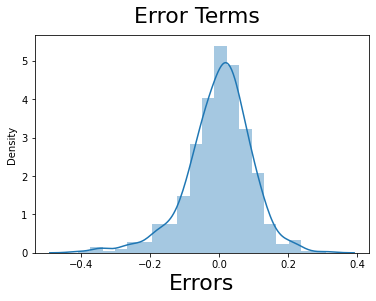

In [236]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 22) 
plt.xlabel('Errors', fontsize = 22)

### <font color=blue>Insights</font>
- We can see that the Residuals are regularly distributed from the aforementioned histogram. So our premise on linear regression is correct.

### <font color=green>_Check Multicollinearity_</font>

In [237]:
#Calculate VIF for Final Model

calculateVIF(X_train_new)

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


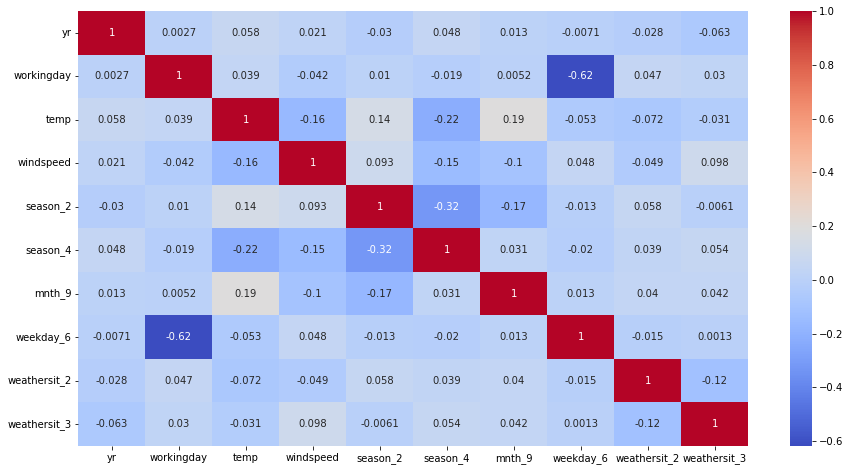

In [238]:
#Show With Heatmap

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="coolwarm")
plt.show()

### <font color=blue>Insights</font>
-  We determined from the VIF calculation that there is no multicollinearity between the predictor variables because all of the values fall within the permitted range of values below 5.

## <font color=orange>Making Prediction Using Final Model</font>

-  It's time to go on and make predictions using the final, or sixth, model, having fitted the model and verified the normality of error terms.

In [240]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0
386,1,0,0,0.128804,0.109186,0.827273,0.365403,0.224919,0,0,...,0,0,0,0,0,0,0,0,1,0
415,1,1,0,0.275214,0.255073,0.527611,0.426105,0.357455,0,0,...,0,0,1,0,0,0,0,0,0,0
599,1,0,1,0.793363,0.732369,0.660606,0.128237,0.890819,0,1,...,0,0,0,0,0,1,0,0,0,0
301,0,0,0,0.243025,0.195377,0.916883,0.678208,0.069604,0,0,...,0,0,0,0,0,0,0,1,0,1
352,0,0,1,0.271061,0.264973,0.662338,0.310273,0.388978,0,0,...,0,1,1,0,0,0,0,0,0,0


In [241]:
#Getting Information of Testing Dataframe

bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [242]:
#Dividing into X_test and y_test

y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [243]:
#Selecting the variables that were part of final model.
col_final=X_train_new.columns
X_test=X_test[col_final]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [244]:
# Making predictions using the final model-lr6

y_pred = lr6.predict(X_test_lm6)

## <font color=orange>Model Evaluation</font>

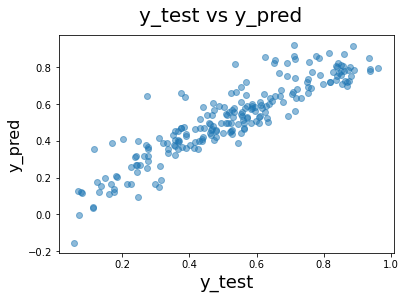

In [245]:
# Plotting y_test and y_pred to for getting understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [246]:
#R^2 Value for TEST

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8203092200749706

In [247]:
# Get the shape of X_test

X_test.shape

(219, 10)

In [249]:
# n is number of rows in X
n = X_test.shape[0]

# We already have the value of R^2 (calculated in above step)
r2=0.8203092200749708

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708829

### <font color=green>_Comparison between Training and Testing Datasets_</font>

### <font color=blue>Insights</font>
- Train dataset R^2          : 0.824
- Test dataset R^2           : 0.820
- Train dataset Adjusted R^2 : 0.821   
- Test dataset Adjusted R^2  : 0.812

## <font color=orange>Final Outcomes</font>

-  According to our final model, the following are the top 3 predictor variables that affect the booking of bikes:

1. __Temperature (temp)__: A coefficient value of 0.5636 meant that for every unit increase in the temp variable, the number of bikes available for rent increased by 0.5636 units.
2. __Weather Situation 3 (weathersit 3)__ - A coefficient value of "-0.3070" showed that, relative to Weathersit1, an increase in the Weathersit3 variable causes a 0.3070 unit drop in the number of bikes available for rent.
3. __Year (yr)__ - A coefficient value of "0.2308" showed that the bike rental numbers rise by 0.2308 units for every unit increase in the yr variable.

### Therefore, it is advised to give these factors the biggest importance when planning in order to achieve maximum booking
-  The following top qualities that can also be taken into account are

4. __season 4__: - A coefficient value of "0.128744" showed that, in relation to season 1, an increase in the season 4 variable by one unit results in an increase in the number of bikes rented by 0.128744 units.
5. __windspeed__: A coefficient value of "-0.155191" showed that the number of bikes available for hire drops by 0.155191 units for every unit rise in the windspeed variable.